In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
datasets = ["BAC"]


for dataset in datasets:
    Ticker = yf.Ticker(dataset)
    data = Ticker.history(start="2023-05-15", end="2023-07-15")
    filename = f"{dataset}_data.csv"
    data.to_csv(filename)
    print(f"Download data for {dataset} and saved as {filename}")

Download data for BAC and saved as BAC_data.csv


In [ ]:
Ticker = 'BAC'
start_date = '2023-05-15'
end_date = '2023-07-15'
data = yf.download(Ticker, start=start_date, end=end_date)['Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

Date
2023-05-15    27.650000
2023-05-16    27.360001
2023-05-17    28.570000
2023-05-18    28.469999
2023-05-19    28.110001
2023-05-22    28.340000
2023-05-23    28.580000
2023-05-24    28.100000
2023-05-25    28.170000
2023-05-26    28.309999
2023-05-30    28.260000
2023-05-31    27.790001
2023-06-01    27.780001
2023-06-02    28.709999
2023-06-05    28.540001
2023-06-06    29.230000
2023-06-07    29.480000
2023-06-08    29.230000
2023-06-09    29.270000
2023-06-12    29.129999
2023-06-13    29.400000
2023-06-14    29.120001
2023-06-15    29.370001
2023-06-16    29.190001
2023-06-20    28.870001
2023-06-21    28.570000
2023-06-22    27.959999
2023-06-23    27.750000
2023-06-26    28.090000
2023-06-27    28.240000
2023-06-28    28.070000
2023-06-29    28.660000
2023-06-30    28.690001
2023-07-03    29.200001
2023-07-05    29.080000
2023-07-06    28.280001
2023-07-07    28.530001
2023-07-10    28.660000
2023-07-11    29.020000
2023-07-12    29.360001
2023-07-13    29.670000
2023-07-14 

# Import Data

In [ ]:
data.head()

Date
2023-05-15    27.650000
2023-05-16    27.360001
2023-05-17    28.570000
2023-05-18    28.469999
2023-05-19    28.110001
Name: Close, dtype: float64

In [ ]:
data.tail()

Date
2023-07-10    28.660000
2023-07-11    29.020000
2023-07-12    29.360001
2023-07-13    29.670000
2023-07-14    29.110001
Name: Close, dtype: float64

In [ ]:
l = data.resample('1M').last()

<Axes: title={'center': 'BAC'}, xlabel='Date'>

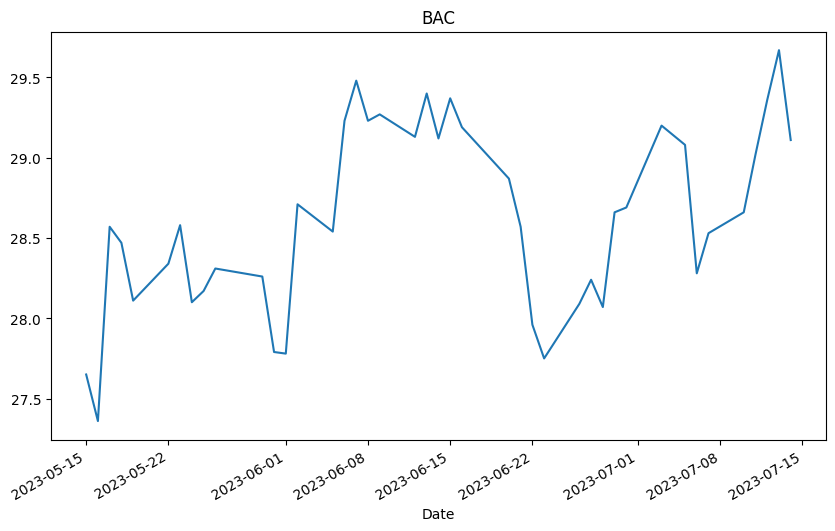

In [ ]:
data.plot(figsize=(10, 6), title='BAC')

In [ ]:
l = data.values
l_0 = data.mean()

In [ ]:
f = np.linspace(-2, 2, len(data))

Text(0, 0.5, 'labels')

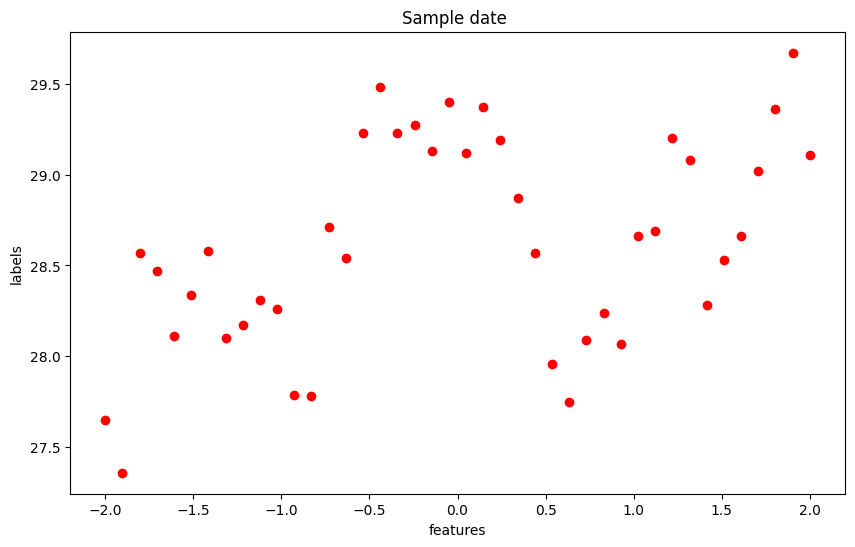

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro')
plt.title('Sample date ')
plt.xlabel('features')
plt.ylabel('labels')

# Success

In [ ]:
# The fuction MSE Calculates the mean-squared-error
def MSE(l, p):
    return np.mean((l - p) ** 2)

In [ ]:
# The fitting of the OLS Regression model up to and including fifth-order-monomials
reg = np.polyfit(f, l, deg=5)

In [ ]:
reg

array([-0.03180353,  0.12267268,  0.30351036, -0.52071558, -0.31470343,
       28.91503064])

In [ ]:
# The prediction by the OLS Regression model given the optimal parameters
p = np.polyval(reg, f)

In [ ]:
#The MSE value given the prediction value
MSE(l, p)

0.18387702243048723

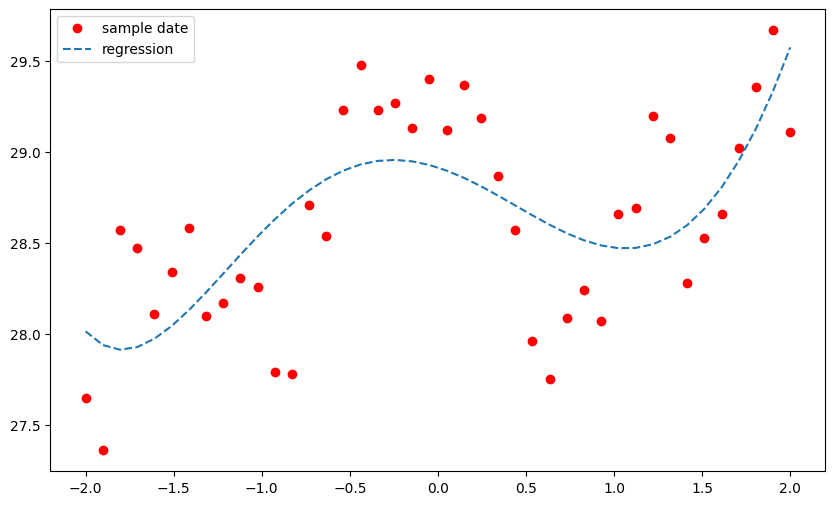

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample date')
plt.plot(f, p, '--', label='regression')
plt.legend();

In [ ]:
import tensorflow as tf
tf.random.set_seed(100)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               512       
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [84]:
%time model.fit(f, l, epochs=1500, verbose=True)

Epoch 1/1500
2/2 [==============================] - 0s 5ms/step - loss: 0.4051
Epoch 2/1500
2/2 [==============================] - 0s 4ms/step - loss: 0.4410
Epoch 3/1500
2/2 [==============================] - 0s 4ms/step - loss: 1.3542
Epoch 4/1500
2/2 [==============================] - 0s 5ms/step - loss: 0.5803
Epoch 5/1500
2/2 [==============================] - 0s 5ms/step - loss: 0.4649
Epoch 6/1500
2/2 [==============================] - 0s 4ms/step - loss: 0.3430
Epoch 7/1500
2/2 [==============================] - 0s 5ms/step - loss: 0.5555
Epoch 8/1500
2/2 [==============================] - 0s 4ms/step - loss: 0.5223
Epoch 9/1500
2/2 [==============================] - 0s 4ms/step - loss: 0.6565
Epoch 10/1500
2/2 [==============================] - 0s 6ms/step - loss: 0.2180
Epoch 11/1500
2/2 [==============================] - 0s 5ms/step - loss: 0.6284
Epoch 12/1500
2/2 [==============================] - 0s 5ms/step - loss: 1.0688
Epoch 13/1500
2/2 [==============================

In [83]:
p = model.predict(f).flatten()

2/2 [==============================] - 0s 4ms/step


In [85]:
MSE(l, p)

0.38552782851296624

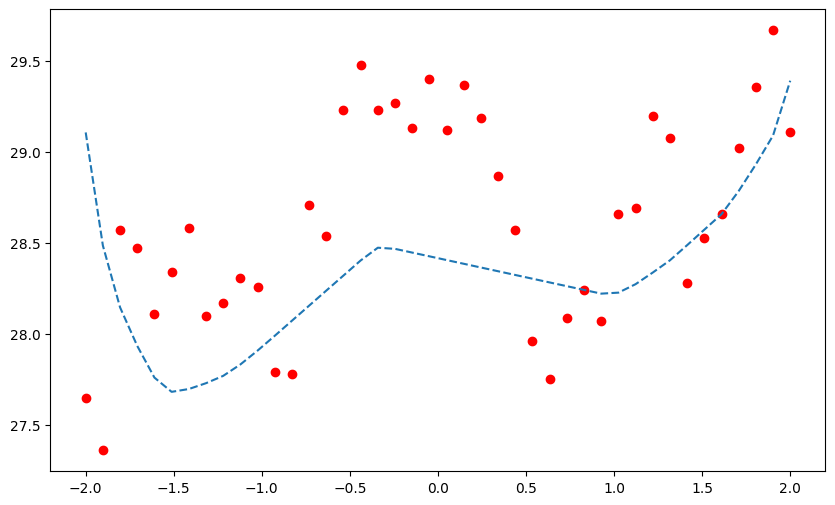

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample date ')
plt.plot(f, p, '--', label='DNN app')

In [87]:
import pandas as pd

In [89]:
res = pd.DataFrame(model.history.history)
res.dropna()
res.tail()

,loss
1495,0.103694
1496,0.128671
1497,0.272319
1498,0.708962
1499,0.261632


Text(0.5, 0, 'epochs')

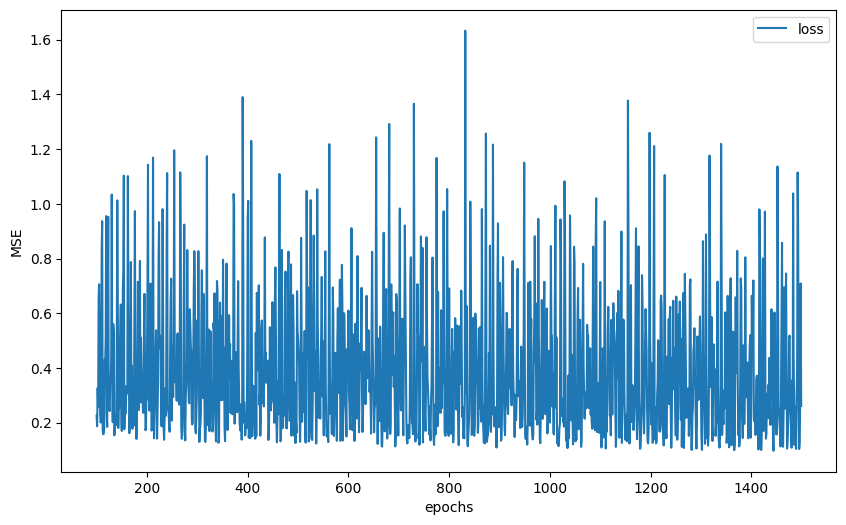

In [90]:
res.iloc[100:].plot(figsize=(10, 6))
plt.ylabel('MSE')
plt.xlabel('epochs')

# Capacity

In [ ]:
reg = {}
for d in range(1, 12, 2):
    reg[d]=np.polyfit(f, l, deg=d)
    p = np.polyval(reg[d], f)
    mse = MSE(l, p)
    print(f'{d:2d} | MSE={mse}')

 1 | MSE=0.2632064923883438
 3 | MSE=0.21240879462159845
 5 | MSE=0.18387702243048723
 7 | MSE=0.1119949724980867
 9 | MSE=0.08172685239892942
11 | MSE=0.05964934545440818


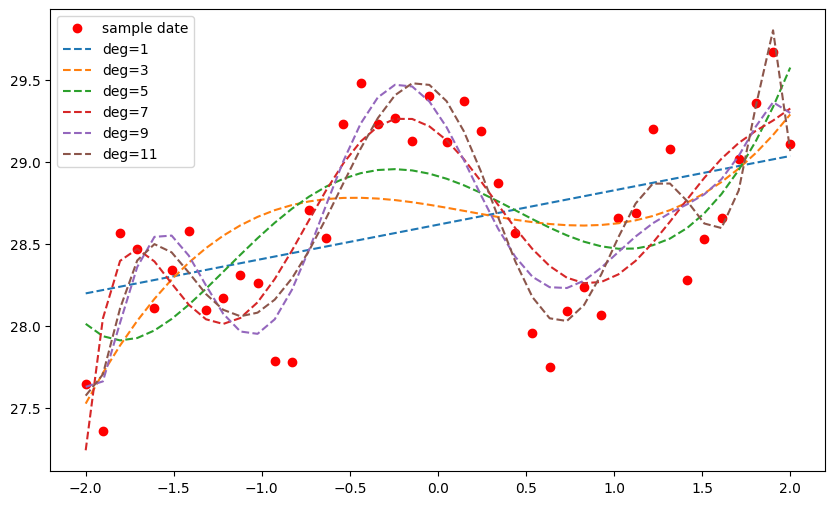

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample date')
for d in reg:
    p = np.polyval(reg[d], f)
    plt.plot(f, p, '--', label=f'deg={d}')
    plt.legend();

In [ ]:
def create_dnn_model(hl=1, hu=256):
    ''' Function to create Keras DNN model.
    Parameters
    ----------
    ----------
    hl: int
        number of hidden layers
    hu: int
        number of hidden units (per laye)
    '''

    model = Sequential()
    for _ in range(hl):
        model.add(Dense(hu, activation='relu', input_dim=1))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='rmsprop')
    return model

In [ ]:
model = create_dnn_model(3)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 132,353
Trainable params: 132,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%time model.fit(f, l, epochs=2500, verbose=False)

CPU times: user 15.4 s, sys: 813 ms, total: 16.2 s
Wall time: 12.8 s


In [ ]:
p = model.predict(f).flatten()

2/2 [==============================] - 0s 4ms/step


In [ ]:
MSE(l, p)

1.415395251279863

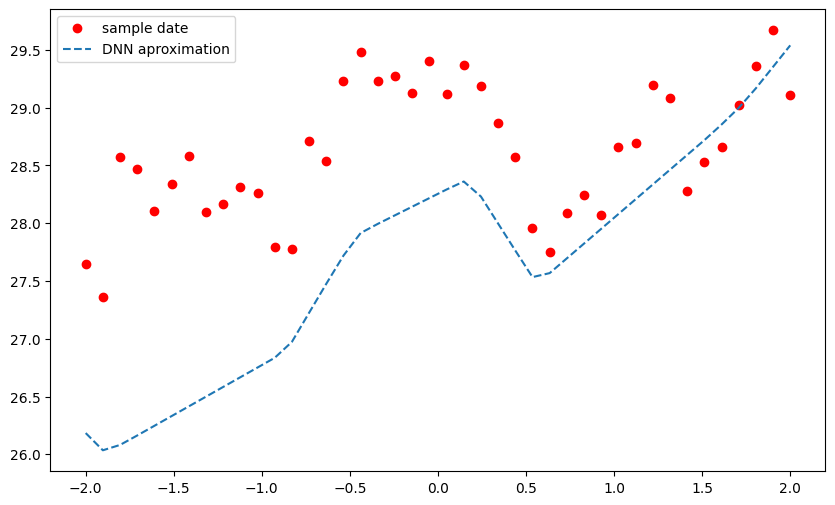

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample date')
plt.plot(f, p, '--', label='DNN aproximation')
plt.legend();

# Evaluation


In [ ]:
te = int(0.25 * len(f))
va = int(0.25 * len(f))

In [ ]:
np.random.seed(100)
ind = np.arange(len(f))
np.random.shuffle(ind)

In [ ]:
ind_te = np.sort(ind[:te])
ind_va = np.sort(ind[te:te + va])
ind_tr = np.sort(ind[te + va:])

In [ ]:
f_te = f[ind_te]
f_va = f[ind_va]
f_tr = f[ind_tr]

In [ ]:
l_te = l[ind_tr]
l_va = l[ind_va]
l_tr = l[ind_tr]

In [ ]:
reg = {}
mse = {}
for d in range(1, 22, 4):
    reg[d] = np.polyfit(f_tr, l_tr, deg=d)
    p = np.polyval(reg[d], f_tr)
    mse_tr = MSE(l_tr, p)
    p = np.polyval(reg[d], f_va)
    mse_va = MSE(l_va, p)
    mse [d] = (mse_tr, mse_va)
    print(f'{d:2d} | MSE_tr={mse_tr:7.5f} | MSE_va={mse_va:7.5f}')

 1 | MSE_tr=0.23568 | MSE_va=0.31081
 5 | MSE_tr=0.11849 | MSE_va=0.57600
 9 | MSE_tr=0.03216 | MSE_va=0.89271
13 | MSE_tr=0.01980 | MSE_va=2.54061
17 | MSE_tr=0.00166 | MSE_va=13533.44415
21 | MSE_tr=0.00000 | MSE_va=1015207839.59853


# Training and Validation Data including Regression fits



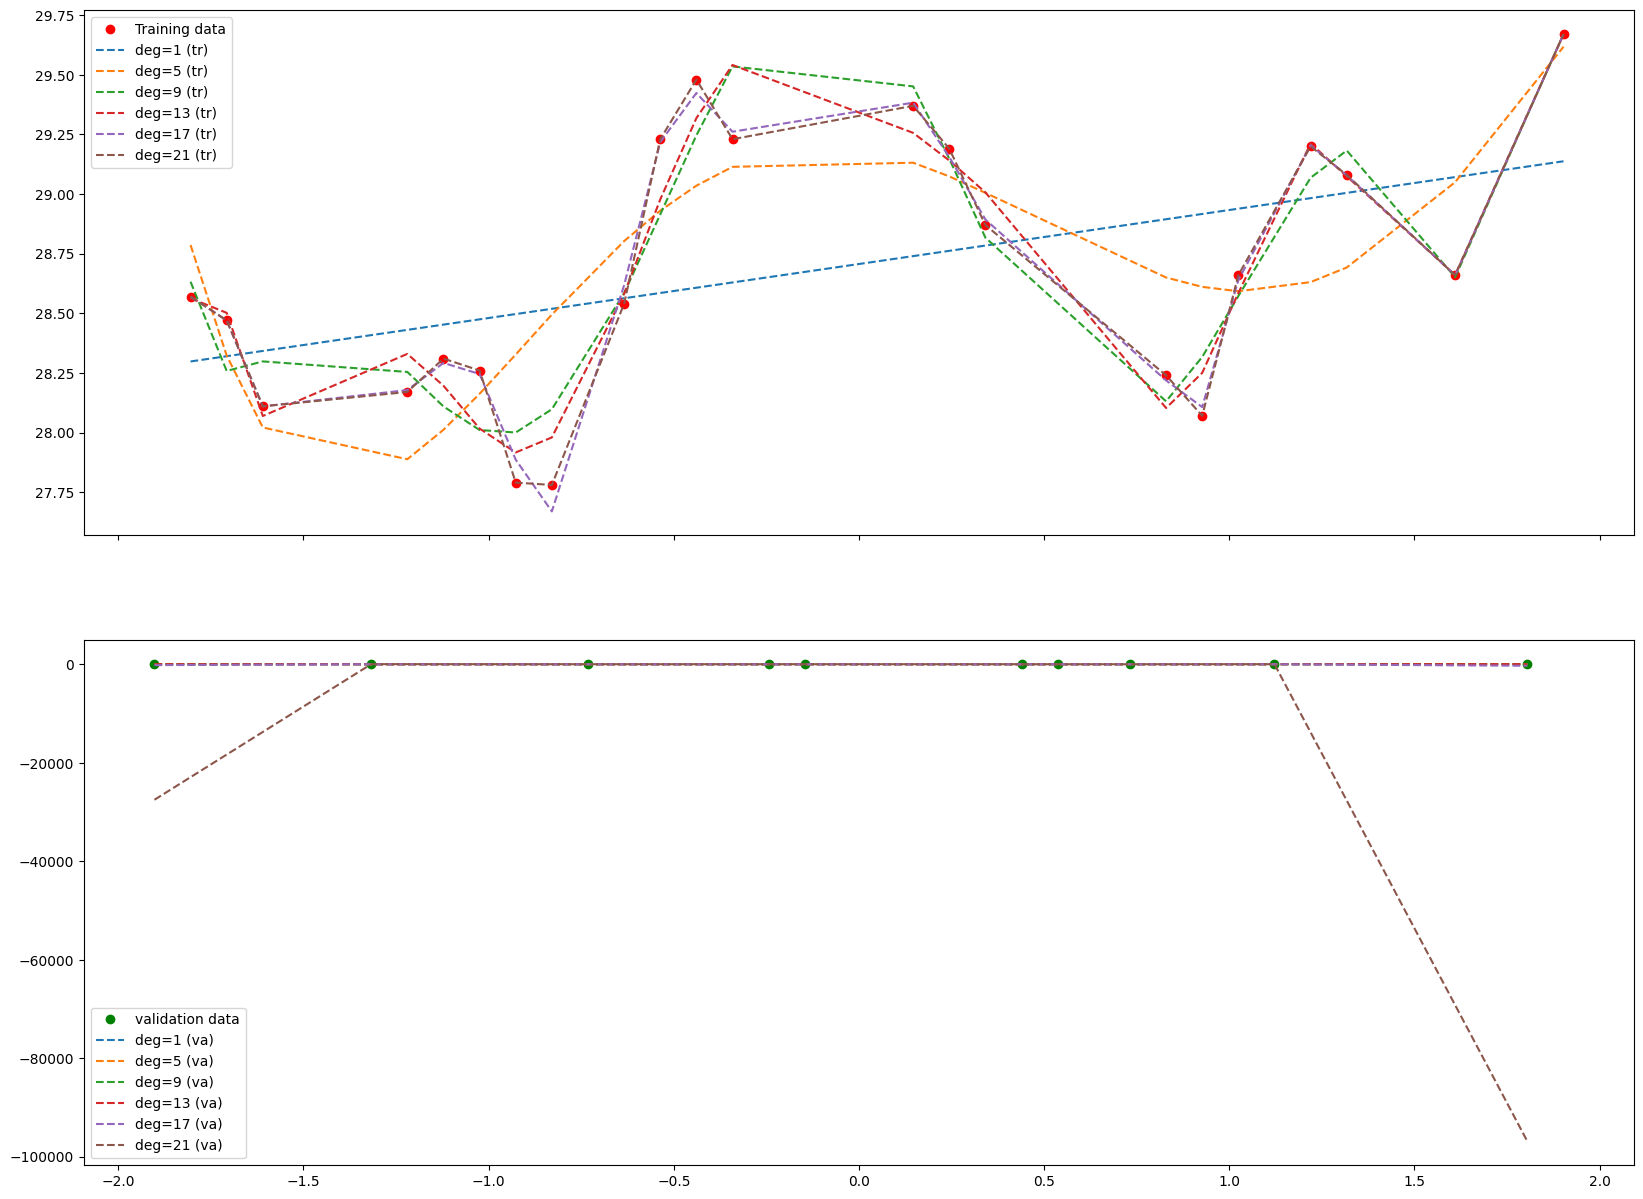

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20, 15), sharex=True)
ax[0].plot(f_tr, l_tr, 'ro', label='Training data')
ax[1].plot(f_va, l_va, 'go', label='validation data')
for d in reg:
    p = np.polyval(reg[d], f_tr)
    ax[0].plot(f_tr, p, '--', label=f'deg={d} (tr)')
    p = np.polyval(reg[d], f_va)
    plt.plot(f_va, p, '--', label=f'deg={d} (va)')
    ax[0].legend()
    ax[1].legend();


In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
model = create_dnn_model(2, 256)


In [ ]:
callbacks = [EarlyStopping(monitor='loss', patience=100, restore_best_weights=True)]

In [91]:
%%time
model.fit(f_tr, l_tr, epochs=3000, verbose=False, validation_data=(f_va, l_va), callbacks=callbacks)

CPU times: user 2.43 s, sys: 73.5 ms, total: 2.51 s
Wall time: 2.83 s


# Training and Validation Data including DNN Predictions

1/1 [==============================] - 0s 15ms/step


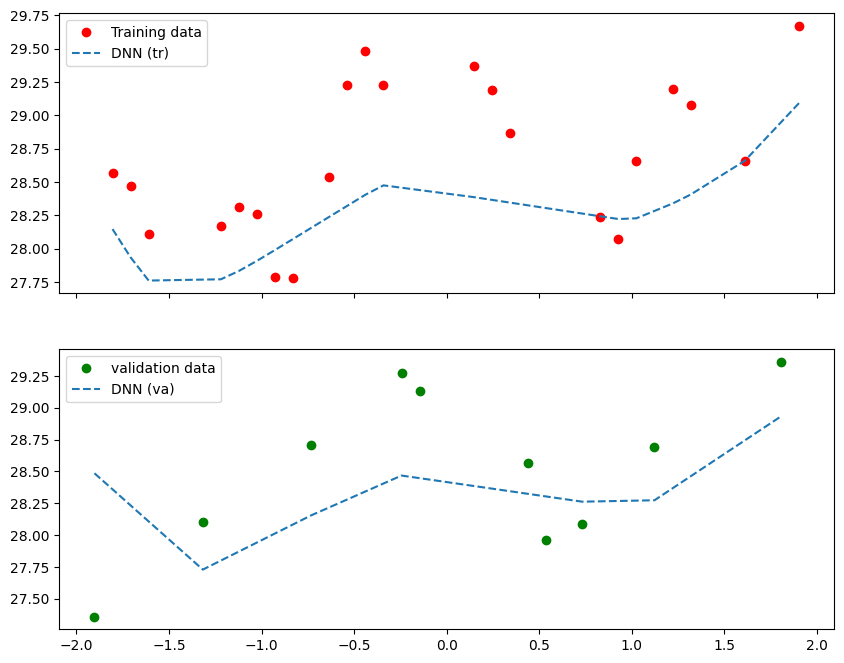

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax[0].plot(f_tr, l_tr, 'ro', label='Training data')
p = model.predict(f_tr)
ax[0].plot(f_tr, p, '--', label=f'DNN (tr)')
ax[0].legend()
ax[1].plot(f_va, l_va,  'go', label="validation data")
p= model.predict(f_va)
ax[1].plot(f_va, p, '--', label=f'DNN (va)')
ax[1].legend();

In [92]:
res = pd.DataFrame(model.history.history)
res.tail()

,loss,val_loss
97,0.317906,0.146848
98,0.328278,0.555891
99,0.317963,0.147215
100,0.328305,0.557234
101,0.318042,0.147678


Text(0.5, 0, 'epochs')

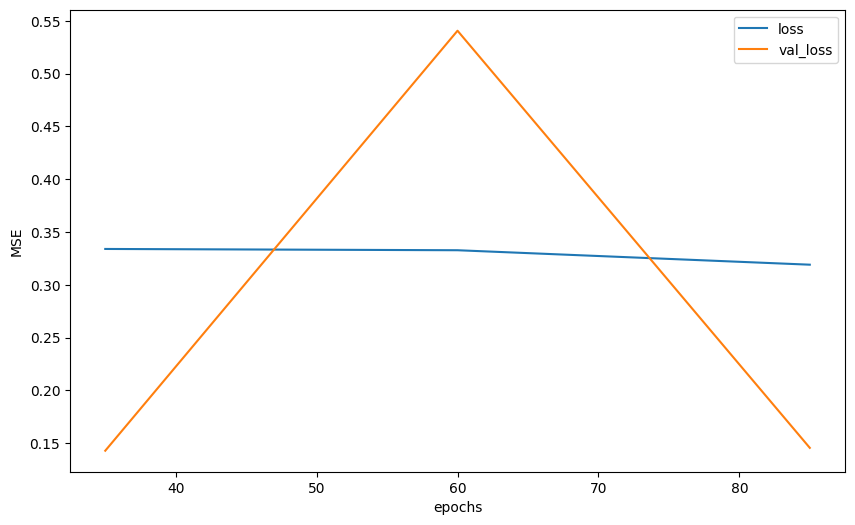

In [93]:
res.iloc[35::25].plot(figsize=(10, 6))
plt.ylabel('MSE')
plt.xlabel('epochs')